In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Importing Modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [9]:
dataset = pd.read_csv("/content/drive/MyDrive/Car mileage prediction/car.csv")
print(dataset)

      Unnamed: 0     name  year  selling_price  km_driven    fuel seller_type  \
0              0   Maruti  2014         450000     145500  Diesel  Individual   
1              2  Hyundai  2010         225000     127000  Diesel  Individual   
2              4  Hyundai  2017         440000      45000  Petrol  Individual   
3              7   Toyota  2011         350000      90000  Diesel  Individual   
4              8     Ford  2013         200000     169000  Diesel  Individual   
...          ...      ...   ...            ...        ...     ...         ...   
2090        6245   Maruti  2017         425000      12000  Petrol  Individual   
2091        6246   Toyota  2014         425000      50000  Diesel  Individual   
2092        6249   Maruti  2011         200000      73000  Petrol  Individual   
2093        6253   Maruti  2017         360000      80000  Petrol  Individual   
2094        6256  Hyundai  2014         475000      80000  Diesel  Individual   

     transmission         o

In [10]:
dataset.head(10)

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power,Mileage Unit,Mileage,Engine
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
5,15,Hyundai,2012,500000,53000,Diesel,Individual,Manual,Second Owner,5,90.00,kmpl,23.00,1396
6,16,Maruti,2002,150000,80000,Petrol,Individual,Manual,Second Owner,5,46.30,kmpl,19.70,796
7,17,Hyundai,2016,680000,100000,Diesel,Individual,Manual,First Owner,5,88.73,kmpl,22.54,1396
8,18,Mahindra,2011,174000,100000,Diesel,Individual,Manual,Second Owner,5,64.10,kmpl,21.00,1461
9,21,Maruti,2012,600000,72000,Diesel,Individual,Manual,First Owner,5,88.80,kmpl,21.50,1248


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2095 non-null   int64  
 1   name           2095 non-null   object 
 2   year           2095 non-null   int64  
 3   selling_price  2095 non-null   int64  
 4   km_driven      2095 non-null   int64  
 5   fuel           2095 non-null   object 
 6   seller_type    2095 non-null   object 
 7   transmission   2095 non-null   object 
 8   owner          2095 non-null   object 
 9   seats          2095 non-null   int64  
 10  max_power      2095 non-null   float64
 11  Mileage Unit   2095 non-null   object 
 12  Mileage        2095 non-null   float64
 13  Engine         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


In [12]:
dataset.describe()

,Unnamed: 0,year,selling_price,km_driven,seats,max_power,Mileage,Engine
count,2095.000000,2095.000000,2.095000e+03,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000
mean,3155.537947,2014.052506,4.272799e+05,67413.593795,5.096897,77.410427,21.397928,1205.078282
std,1791.039215,3.273451,2.326698e+05,41580.846333,0.457000,19.884938,1.209234,245.058696
min,0.000000,2000.000000,4.595700e+04,1000.000000,4.000000,35.000000,19.600000,624.000000
25%,1589.500000,2012.000000,2.500000e+05,35000.000000,5.000000,67.040000,20.360000,998.000000
50%,3185.000000,2014.000000,3.900000e+05,60000.000000,5.000000,74.000000,21.100000,1248.000000
75%,4709.500000,2017.000000,5.555000e+05,90000.000000,5.000000,88.730000,22.540000,1396.000000
max,6256.000000,2020.000000,1.594000e+06,270000.000000,8.000000,126.320000,23.590000,1598.000000


In [13]:
dataset.isnull().sum()

,0
Unnamed: 0,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
seats,0


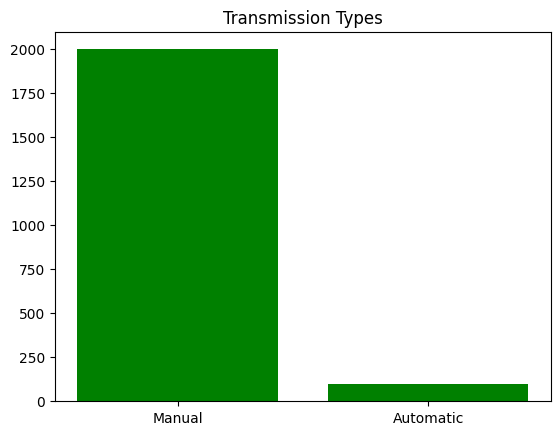

In [14]:
plt.title("Transmission Types")
plt.bar(dataset["transmission"].unique(), dataset["transmission"].value_counts(), color="green")
plt.show()

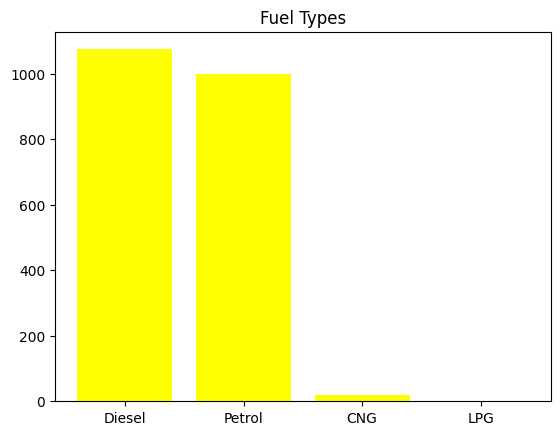

In [15]:
plt.title("Fuel Types")
plt.bar(dataset["fuel"].unique(), dataset["fuel"].value_counts(), color="yellow")
plt.show()

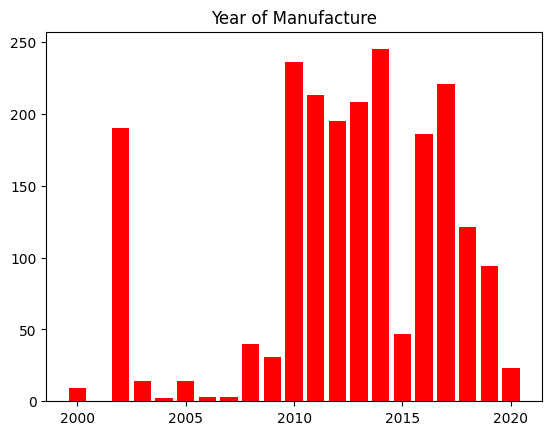

In [16]:
plt.title("Year of Manufacture")
plt.bar(dataset["year"].unique(), dataset["year"].value_counts(), color="red")
plt.show()

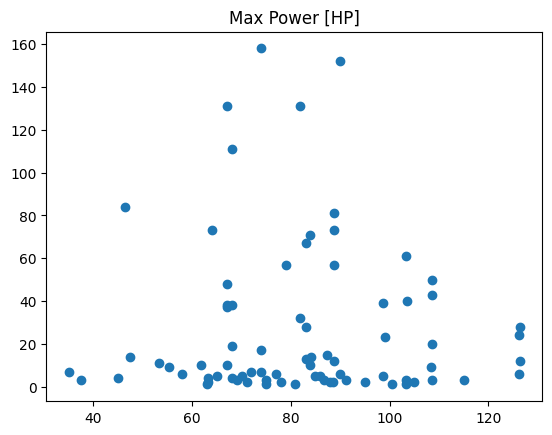

In [17]:
plt.title("Max Power [HP]")
plt.scatter(dataset["max_power"].unique(), dataset["max_power"].value_counts())
plt.show()

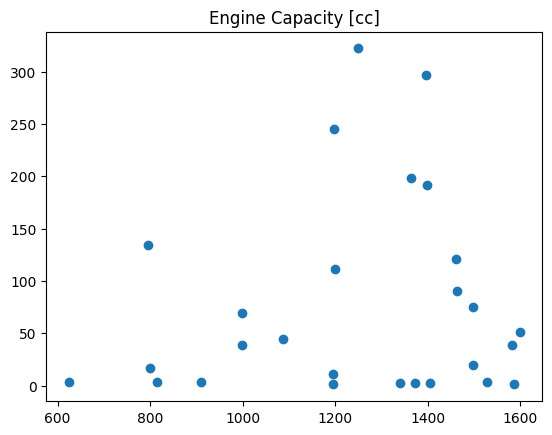

In [18]:
plt.title("Engine Capacity [cc]")
plt.scatter(dataset["Engine"].unique(), dataset["Engine"].value_counts())
plt.show()

In [19]:
# Extract Features and Labels.
x_data = dataset[["year", "km_driven", "fuel", "transmission", "owner", "seats", "max_power", "Mileage Unit", "Engine"]]
y_data = dataset["Mileage"]
del dataset

In [20]:
# Encoding Features.
categorical_features = ["year","fuel", "transmission",  "owner", "seats", "Mileage Unit"]
encoders = [LabelEncoder() for _ in range(len(categorical_features))]

for index, feature in enumerate(categorical_features):
    x_data[feature] = encoders[index].fit_transform(x_data[feature])

In [21]:
# Spliting the Dataset.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [22]:
dtr = DecisionTreeRegressor().fit(x_train, y_train)
rfr = RandomForestRegressor().fit(x_train, y_train)

In [23]:
# Model Predictions.
dtr_pred = dtr.predict(x_test)
rfr_pred = rfr.predict(x_test)

In [24]:
# Model Evaluations.
print(f"\nACCURACY: [DTR]: {r2_score(y_test,  dtr_pred)}" +
     f"\nACCURACY: [RFR]: {r2_score(y_test, rfr_pred)}")


ACCURACY: [DTR]: 0.7815257748363983
ACCURACY: [RFR]: 0.8700907913590039


In [25]:
y_test = np.array(y_test)
for index in range(5):
    print(f"\nACTUAL: {y_test[index]}, PREDICTION: {rfr_pred[index]}")


ACTUAL: 19.7, PREDICTION: 19.700000000000035

ACTUAL: 19.72, PREDICTION: 20.097800000000028

ACTUAL: 21.1, PREDICTION: 21.208099999999966

ACTUAL: 22.9, PREDICTION: 23.06000000000004

ACTUAL: 21.1, PREDICTION: 21.102099999999965


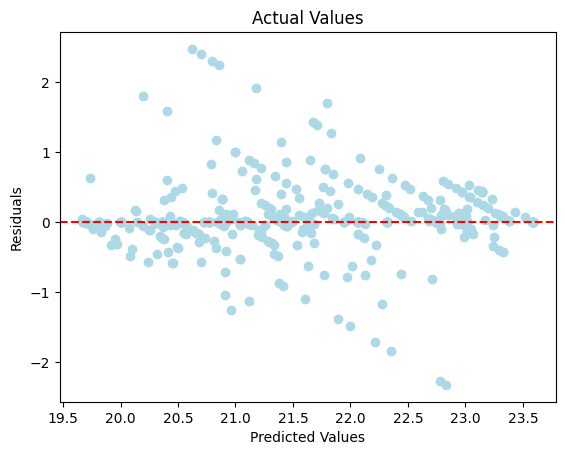

In [26]:
residuals = y_test - rfr_pred
plt.title("Actual Values")
plt.scatter(rfr_pred, residuals, color="lightblue")
#plt.plot(rfr_pred, marker="*")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()